안녕하세요, 오늘은 머신러닝 애플리케이션 중 가장 상업적인 성공을 거둔 것으로 평가받고 있는 추천 시스템(Recommender System) 에 대해 알아보려고 합니다. 어느덧 추천 시스템은 우리 생활 깊숙이 들어와 있습니다. 유튜브, 넷플릭스 등 동영상 플랫폼이 기가 막히게 내가 좋아할 만한 콘텐츠를 찾아서 자동으로 플레이해 주고 있습니다. 아마존, 쿠팡 온라인 쇼핑 사이트에서도 내 취향에 맞는 상품 추천을 쉽게 접할 수 있습니다. 페이스북, 인스타그램 같은 SNS는 말할 것도 없고, 어쩌면 느끼지도 못하셨겠지만 뉴스나 광고까지도 추천 시스템의 원리가 숨어들어 있습니다.

이런 추천 시스템의 원리를 한 문장으로 줄인다면 나와 비슷한 다른 사용자들이 좋아하는 것과 비슷한 것을 내게 추천해 준다 일 것입니다. 하지만 어떤 사용자들이 나와 비슷한지를 어떻게 알 수 있을까요? 또 어떤 상품이나 정보가 서로 유사한지는 어떻게 알 수 있는 걸까요? 오늘의 과정을 통해 추천 시스템의 기본 원리를 파악해 보고 나만의 추천 시스템을 만들 수 있는 멋진 아이디어를 떠올려 봅시다.


__목차__

1. 추천 시스템이란 게 뭔가요?
1. 데이터 탐색하기와 전처리
1. 사용자의 명시적/암묵적 평가
1. Matrix Factorization(MF)
1. CSR(Compressed Sparse Row) Matrix
1. MF 모델 학습하기
1. 비슷한 아티스트 찾기 + 유저에게 추천하기
1. 프로젝트 - MovieLens 영화 추천 실습

## 13-2. 추천 시스템이란 게 뭔가요?

온라인 콘텐츠 서비스에서 데이터 분석과 AI 기술을 접목한 추천 시스템의 활용은 이제 선택이 아닌 필수가 된 것 같습니다. 우리가 흔히 사용하고 있는 음원 서비스를 예로 들어 볼까요?

유튜브 뮤직, 스포티파이, 애플 뮤직, 멜론 등 여러 음원 서비스 중 추천 시스템을 통한 개인화 서비스가 없는 곳을 찾기가 힘들어졌지요. 과거 음원 차트로 유명하던 멜론에서도 2020년의 업데이트에서 메인이었던 음원 차트를 홈화면에서 없애고 개인 맞춤 서비스를 전면에 배치했습니다.

이러한 음원 서비스 제공자들은 수많은 유저들이 어떤 아티스트의 노래를 들었는지에 대한 광범위한 데이터를 축적하고 있습니다. 이러한 빅데이터가 정확한 추천의 원동력이 되고 있다는 것은 어렴풋이 짐작할 수 있을 것입니다.

그러나 그 추천의 원리가 어떤 것인지 좀 더 구체적으로 파악하고 싶지 않으신가요? 그럼 아래 링크의 아티클을 읽어본 후 이어지는 질문에 답변해 봅시다.

http://dl.moazine.com/viewer/index.asp?libraryid=9MtJb2T3nzH3yk7c212iu821DPFsY2ECOso0&a_i=8wwot4affaz3r6syx11VOYm2&keyword=&s_i=9#page/2

추천 시스템은 이처럼

>1. 아이템은 매우 많고
2. 유저의 취향은 다양할 때

유저가 소비할 만한 아이템을 예측하는 모델입니다.

몇 가지 실제 사례를 보면,

> - 유튜브 : 동영상이 매일 엄청나게 많이 올라오고 유저의 취향(게임 선호, 뷰티 선호, 지식 선호, 뉴스 선호)이 다양합니다.
> 
> - 페이스북 : 포스팅되는 글이 엄청 많고 유저가 관심 있는 페이지, 친구, 그룹은 전부 다릅니다.
>
> - 아마존 : 카테고리를 한정해도 판매 품목이 엄청 많고 좋아하는 브랜드, 구매 기준이 다양합니다.


아티스트는 수없이 많고 새로운 아티스트가 계속 나오기 때문에, 유튜브 같은 추천 기반의 미디어 회사들은 꾸준히 아이템이 되는 아티스트 정보를 자동으로 수집하고, 사용자들이 아티스트를 선택한 정보를 업데이트하여 축적하고 있습니다. 이렇게 쌓인 방대한 데이터가 정확한 협업 필터링을 위한 기반이 됩니다.

오늘 우리는 이렇게 쌓인 데이터 사례 중 하나를 활용하여 유저가 좋아하는 특정 아티스트와 유사한 다른 아티스트를 추천하는 추천 시스템을 만들어 보려고 합니다. Last.fm에서는 어떤 유저가 특정 아티스트의 노래를 몇 번이나 들었는지에 대한 데이터를 제공하고 있습니다. 2010년에 미국에서 서비스되고 있는 spotify에서 발생한 데이터이기 때문에 생소한 아티스트가 많을 수 있습니다.

오늘 사용하게 될 데이터셋은 압축을 풀기 전에 543MB, 압축을 풀고 나면 1.6GB가 넘어가는 꽤 큰 용량을 자랑합니다. 하지만 이미 클라우드에 올라와 있기 때문에 아래와 같이 디렉터리를 생성하고 심볼릭 링크만 걸어주시면 됩니다.

In [1]:
# ! mkdir -p ~/aiffel/recommendata_iu/data/lastfm-dataset-360K
# ! ln -s ~/data/lastfm-dataset-360K/* ~/aiffel/recommendata_iu/data/lastfm-dataset-360K

https://arena.kakao.com/c/7  
'아이유'를 좋아하시는 팬들께 쑥스러운 🙏사과 말씀🙏을 드립니다. 오늘 사용하게 될 미국 데이터로는 '아이유팬이 좋아할 만한 다른 아티스트'를 추천할 수는 없습니다. 하지만 최근에 카카오에서 학술용으로만 공개한 멜론 데이터를 활용한다면 오늘 학습한 방법으로 정말 아이유와 관련된 추천을 할 수 있을 것입니다.

## 13-3. 데이터 탐색하기와 전처리

### 데이터 준비

--------------------------------------

그럼 데이터를 열어서 몇 가지 확인 및 전처리를 진행해 봅시다. 역시나 이번에도 우리의 친구는 Pandas입니다. 1.6Gb가 넘어가는 이렇게 큰 데이터를 처리하는데도 우리의 Pandas는 끄떡없다는 사실에 새삼 놀랍기도 합니다.

이전 스텝에서 확인한 바로는, 우리가 다룰 데이터는 그동안 흔히 보던 csv 파일이 아니고 tsv 파일입니다. 어떻게 생긴 파일일까요? 다음과 같이 열어 봅시다. 혹시나 해서 당부드립니다만, 굳이 vi를 사용해서 1.6Gb 짜리 데이터 전체를 통째로 메모리 상에 열어보지는 않도록 합시다.

In [2]:
# ! more ~/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv

In [3]:
import pandas as pd
import os

fname = os.getenv('HOME') + '/aiffel/recommendata_iu/data/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
col_names = ['user_id', 'artist_MBID', 'artist', 'play']   # 임의로 지정한 컬럼명
data = pd.read_csv(fname, sep='\t', names= col_names)      # sep='\t'로 주어야 tsv를 열 수 있습니다.  
data.head(10)

,user_id,artist_MBID,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,8bfac288-ccc5-448d-9573-c33ea2aa5c30,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,6531c8b1-76ea-4141-b270-eb1ac5b41375,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,c5db90c4-580d-4f33-b364-fbaa5a3a58b5,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403


artist_MBID 항목은 우리의 관심사가 아닙니다. 사용하는 컬럼만 남기고 제거하도록 하겠습니다.

In [4]:
# 사용하는 컬럼만 남겨줍니다.
using_cols = ['user_id', 'artist', 'play']
data = data[using_cols]
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [5]:
# 검색을 쉽게 하기 위해 아티스트 문자열을 소문자로 바꿔 줍시다.
data['artist'] = data['artist'].str.lower() 
data.head(10)

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


In [6]:
# 첫 번째 유저가 무슨 
condition = (data['user_id']== data.loc[0, 'user_id'])
data.loc[condition]

,user_id,artist,play
0,00000c289a1829a808ac09c00daf10bc3c4e223b,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,die ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,juliette & the licks,706
5,00000c289a1829a808ac09c00daf10bc3c4e223b,red hot chili peppers,691
6,00000c289a1829a808ac09c00daf10bc3c4e223b,magica,545
7,00000c289a1829a808ac09c00daf10bc3c4e223b,the black dahlia murder,507
8,00000c289a1829a808ac09c00daf10bc3c4e223b,the murmurs,424
9,00000c289a1829a808ac09c00daf10bc3c4e223b,lunachicks,403


처음 들어보는 아티스트가 많습니다. 추천 시스템에서는 적용하는 분야에 대한 지식이 특히 더 필요한데, 모르면 검증을 못 하기 때문입니다.

### 데이터 탐색

-----------------------------------------

추천 모델을 만들기 전에 데이터의 기본적인 정보를 보고 갑시다. 아래 항목들을 확인해 보고 싶습니다.

유저 수, 아티스트 수, 인기 많은 아티스트
유저들이 몇 명의 아티스트를 듣고 있는지에 대한 통계
유저 play 횟수 중앙값에 대한 통계
(참고) pandas.DataFrame.nunique()은 특정 컬럼에 포함된 유니크한 데이터의 개수를 알아보는데 유용합니다.

In [7]:
# 유저 수
data['user_id'].nunique()

358868

In [8]:
# 아티스트 수
data['artist'].nunique()

291346

In [9]:
# 인기 많은 아티스트
artist_count = data.groupby('artist')['user_id'].count()
artist_count.sort_values(ascending=False).head(30)  # top30

artist
radiohead                77254
the beatles              76245
coldplay                 66658
red hot chili peppers    48924
muse                     46954
metallica                45233
pink floyd               44443
the killers              41229
linkin park              39773
nirvana                  39479
system of a down         37267
queen                    34174
u2                       33206
daft punk                33001
the cure                 32624
led zeppelin             32295
placebo                  32072
depeche mode             31916
david bowie              31862
bob dylan                31799
death cab for cutie      31482
arctic monkeys           30348
foo fighters             30144
air                      29795
the rolling stones       29754
nine inch nails          28946
sigur rós                28901
green day                28732
massive attack           28691
moby                     28232
Name: user_id, dtype: int64

In [10]:
# 유저별 몇 명의 아티스트를 듣고 있는지에 대한 통계
user_count = data.groupby('user_id')['artist'].count()
user_count.describe()

count    358868.000000
mean         48.863234
std           8.524272
min           1.000000
25%          46.000000
50%          49.000000
75%          51.000000
max         166.000000
Name: artist, dtype: float64

In [11]:
# 유저별 play횟수 중앙값에 대한 통계
user_median = data.groupby('user_id')['play'].median()
user_median.describe()

count    358868.000000
mean        142.187676
std         213.089902
min           1.000000
25%          32.000000
50%          83.000000
75%         180.000000
max       50142.000000
Name: play, dtype: float64

### 모델 검증을 위한 사용자 초기 정보 세팅

-------------------------------------

우리는 본인의 음악 취향과 가장 유사한 아티스트를 추천받고 싶습니다. 유튜브 뮤직 등 추천 시스템들은 이를 위해서 처음 가입하는 사용자의 취향과 유사한 아티스트 정보를 5개 이상 입력받는 과정을 거치게 하는 경우가 많습니다.
우리도 동일한 과정이 필요합니다. 우리가 만든 추천 시스템의 추후 검증 과정을 위해, '나는 A를 좋아한다.'라는 정보를 위 데이터셋에 5개 이상 추가해 주어야 합니다. 저는 아래와 같이 제가 좋아하는 유명한 아티스트들을 기존의 데이터에 추가해서 넣겠습니다.

In [12]:
# 본인이 좋아하시는 아티스트 데이터로 바꿔서 추가하셔도 됩니다! 단, 이름은 꼭 데이터셋에 있는 것과 동일하게 맞춰주세요. 
my_favorite = ['black eyed peas' , 'maroon5' ,'jason mraz' ,'coldplay' ,'beyoncé']

# 'zimin'이라는 user_id가 위 아티스트의 노래를 30회씩 들었다고 가정하겠습니다.
my_playlist = pd.DataFrame({'user_id': ['zimin']*5, 'artist': my_favorite, 'play':[30]*5})

if not data.isin({'user_id':['zimin']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    data = data.append(my_playlist)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

data.tail(10)       # 잘 추가되었는지 확인해 봅시다.

,user_id,artist,play
17535650,"sep 20, 2008",turbostaat,12
17535651,"sep 20, 2008",cuba missouri,11
17535652,"sep 20, 2008",little man tate,11
17535653,"sep 20, 2008",sigur rós,10
17535654,"sep 20, 2008",the smiths,10
0,zimin,black eyed peas,30
1,zimin,maroon5,30
2,zimin,jason mraz,30
3,zimin,coldplay,30
4,zimin,beyoncé,30


### 모델에 활용하기 위한 전처리 (실습)

------------------------------

사람이 태어나면 주민등록번호가, 학교에 가면 출석번호가 있듯이 데이터의 관리를 쉽게 하기 위해 번호를 붙여주고 싶습니다. 우리가 다루는 데이터에서는 user와 artist 각각에 번호를 붙이고 싶습니다. 보통 이런 작업을 indexing이라고 합니다. 추천 시스템, 자연어 처리에서 자주 하는 작업들이라 직접 해보시면 좋겠습니다.

(참고) pandas.DataFrame.unique()은 특정 컬럼에 포함된 유니크한 데이터만 모아 줍니다. indexing 작업을 위해 매우 유용합니다.

In [13]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = data['user_id'].unique()
artist_unique = data['artist'].unique()

# 유저, 아티스트 indexing 하는 코드 idx는 index의 약자입니다.
user_to_idx = {v:k for k,v in enumerate(user_unique)}
artist_to_idx = {v:k for k,v in enumerate(artist_unique)}

In [14]:
# 인덱싱이 잘 되었는지 확인해 봅니다. 
print(user_to_idx['zimin'])    # 358869명의 유저 중 마지막으로 추가된 유저이니 358868이 나와야 합니다. 
print(artist_to_idx['black eyed peas'])

358868
376


In [15]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드
# dictionary 자료형의 get 함수는 https://wikidocs.net/16 을 참고하세요.

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = data['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(data):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    data['user_id'] = temp_user_data   # data['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# artist_to_idx을 통해 artist 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_artist_data = data['artist'].map(artist_to_idx.get).dropna()
if len(temp_artist_data) == len(data):
    print('artist column indexing OK!!')
    data['artist'] = temp_artist_data
else:
    print('artist column indexing Fail!!')

data

user_id column indexing OK!!
artist column indexing OK!!


,user_id,artist,play
0,0,0,2137
1,0,1,1099
2,0,2,897
3,0,3,717
4,0,4,706
...,...,...,...
0,358868,376,30
1,358868,270115,30
2,358868,3746,30
3,358868,62,30


In [16]:
# map과 get의기능
a = {'npame':'ey', 'phone':'0119993323', 'birth': '1118'}  # 딕셔너리의 값들을
b = ['phone', 'birth',  "name", "what"]  
b = pd.DataFrame(b) # 데이터 프레임을 시리즈로 바꾸고 시르즈에서 
b[0].map(a.get)  # 해당하는 키값으로 넣고 없는 값은 none을 넣는다

0    0119993323
1          1118
2          None
3          None
Name: 0, dtype: object

In [17]:
b[0].map(a.get).dropna()  # dropna를 하면 매칭되지 못한 값을 버린다

0    0119993323
1          1118
Name: 0, dtype: object

## 13-4. 사용자의 명시적/암묵적 평가

우리의 추천 시스템은 사용자들이 아이템을 얼마나 선호하는지를 모델링 하기를 원합니다. 그러자면 사용자의 아이템 선호도를 말해 주는 유저 행동 데이터셋이 필요합니다. 만약 우리 데이터가 좋아요나 별점처럼 선호도를 명시적(explicit)으로 나타내는 것이라면 참 좋겠지만, 지금 우리가 가지고 있는 데이터는 사용자가 아티스트의 곡을 몇 번 플레이했나 하는 것뿐입니다. 이렇게 서비스를 사용하면서 자연스럽게 발생하는 암묵적(implicit)인 피드백도 사용자의 아이템에 대한 평가를 알 수 있는 단서가 될 수 있습니다.

[Collaborative Filtering for Implicit Feedback Datasets](http://yifanhu.net/PUB/cf.pdf) 논문에는 추천시스템에서 암묵적 피드백 데이터셋을 활용할 때의 고민이 잘 담겨있습니다. 해당 논문에서는 이를 위해 염두해두어야할 암묵적 피드백 데이터셋의 특징을 다음과 같이 정리합니다.

- 부정적인 피드백이 없다.(No Negative Feedback)
- 애초에 잡음이 많다.(Inherently Noisy)
- 수치는 신뢰도를 의미한다.(The numerical value of implicit feedback indicates confidence)
- Implicit-feedback Recommender System의 평가는 적절한 방법을 고민해봐야 한다.(Evaluation of implicit-feedback recommender requires appropriate measures)

In [18]:
# 1회만 play한 데이터의 비율을 보는 코드
only_one = data[data['play']<2]
one, all_data = len(only_one), len(data)
print(f'{one},{all_data}')
print(f'Ratio of only_one over all data is {one/all_data:.2%}')  # f-format에 대한 설명은 https://bit.ly/2DTLqYU

147740,17535660
Ratio of only_one over all data is 0.84%


우리가 앞으로 만들어갈 모델에서는 암묵적 데이터의 해석을 위해 다음과 같은 규칙을 적용할 것입니다.

> 1. 한 번이라도 들었으면 선호한다고 판단한다.
>
> 2. 많이 재생한 아티스트에 대해 가중치를 주어서 더 확실히 좋아한다고 판단한다.

## 13-5. Matrix Factorization(MF)

데이터가 준비되었으니 이제 모델을 만들 차례입니다!

아래 그림의 왼쪽에서 보는 것처럼, 우리는 m명의 사용자들이 n명의 아티스트에 대해 평가한 데이터를 포함한 (m,n) 사이즈의 평가 행렬(Rating Matrix)을 만들 것입니다. 행렬 중 일부는 데이터가 채워져 있지만, 나머지 부분은 데이터가 비어 있습니다. 우리가 앞에서 살펴보았던 추천 시스템의 협업 필터링(Collaborative Filtering)이란 결국은 이런 평가 행렬을 전제로 하는 것입니다. 만약 우리가 이 평가 행렬의 비어 있는 부분을 포함한 완벽한 정보를 얻을 수만 있다면 (모든 사용자의 모든 아이템에 대한 선호도를 다 파악한 셈이니) 그야말로 완벽한 추천이 가능해질 것입니다.

우리는 추천 시스템의 다양한 모델 중 Matrix Factorization(MF, 행렬 분해) 모델을 사용하겠습니다. MF 모델은 2006년 Netflix에서 백만 달러의 상금을 걸고 개최한 자사 추천 시스템의 성능을 10% 이상 향상시키는 챌린지를 계기로 알려지게 되었습니다. 기본 아이디어는 아래 그림과 같습니다. (m,n) 사이즈의 행렬 R을 (m,k) 사이즈의 행렬 P와 (k,n) 사이즈의 행렬 Q로 분해한다면 R이란 그저 P와 Q의 행렬곱으로 표현 가능할 수 있다는 간단한 아이디어입니다. 대체로 k는 m이나 n보다 훨씬 작은 값이기 때문에 계산량 측면으로도 훨씬 유리해집니다. 하지만 아이디어의 단순함에도 불구하고 MF 모델은 성능이 준수하고 Scalability가 좋아서 많이 사용되는 모델입니다.

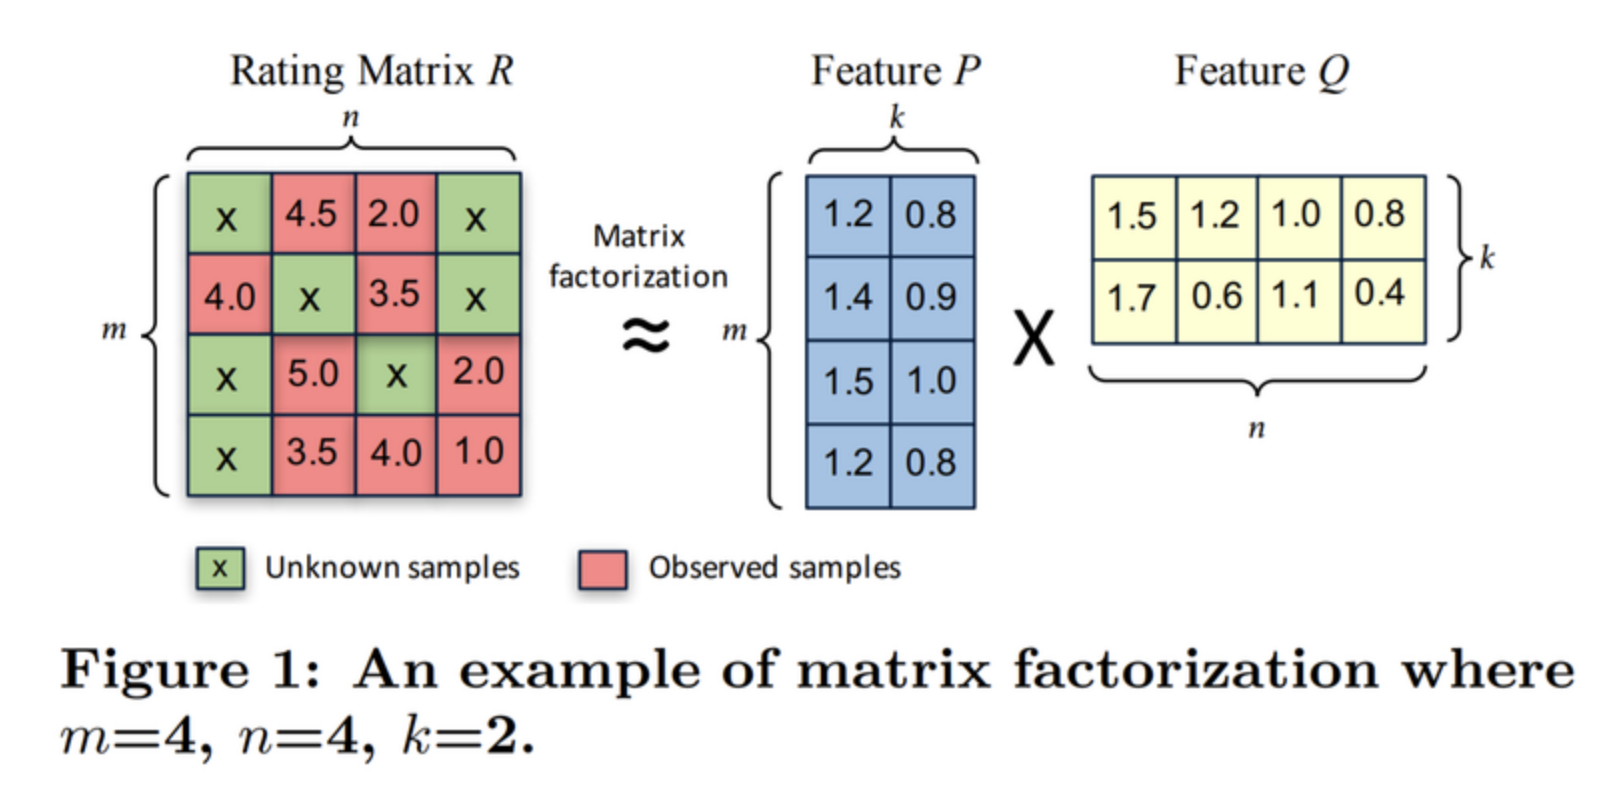

아래 그림을 다시 한번 봅시다. 위에 소개한 MF 모델의 개요도와 크게 다를 것은 없습니다. 단지, MF 모델을 사용자에게 영화를 추천하는 모델에 대입해서 그려 보았다는 정도의 차이가 있습니다. 위 그림 방식으로 말하자면 m=4, n=5, k=2인 MF 모델이 되겠군요.

위에서 MF 모델은 큰 평가 행렬 R을 두 개의 Feature Matrix P와 Q로 분해한다고 하였습니다.
무엇의 Feature일까요? (m, k) 사이즈의 Feature Matrix P는 k 차원의 벡터를 사용자 수만큼 모아놓은 행렬입니다. 그렇다면 아래 그림에서 첫 번째 벡터 $P_0 =(1, 0.1)$은 바로 빨간 모자를 쓴 첫 번째 사용자의 특성(Feature) 벡터가 됩니다.  
같은 방식으로 Q 행렬의 첫 번째 벡터 $Q_0 =(0.9, -0.2)$는 해리포터 영화의 특성 벡터가 되겠지요. MF 모델은 이 두 벡터를 내적해서 얻어지는 0.88이 바로 $R_{0,0}$ 으로 정의되는 사용자의 영화 선호도로 보는 모델입니다.

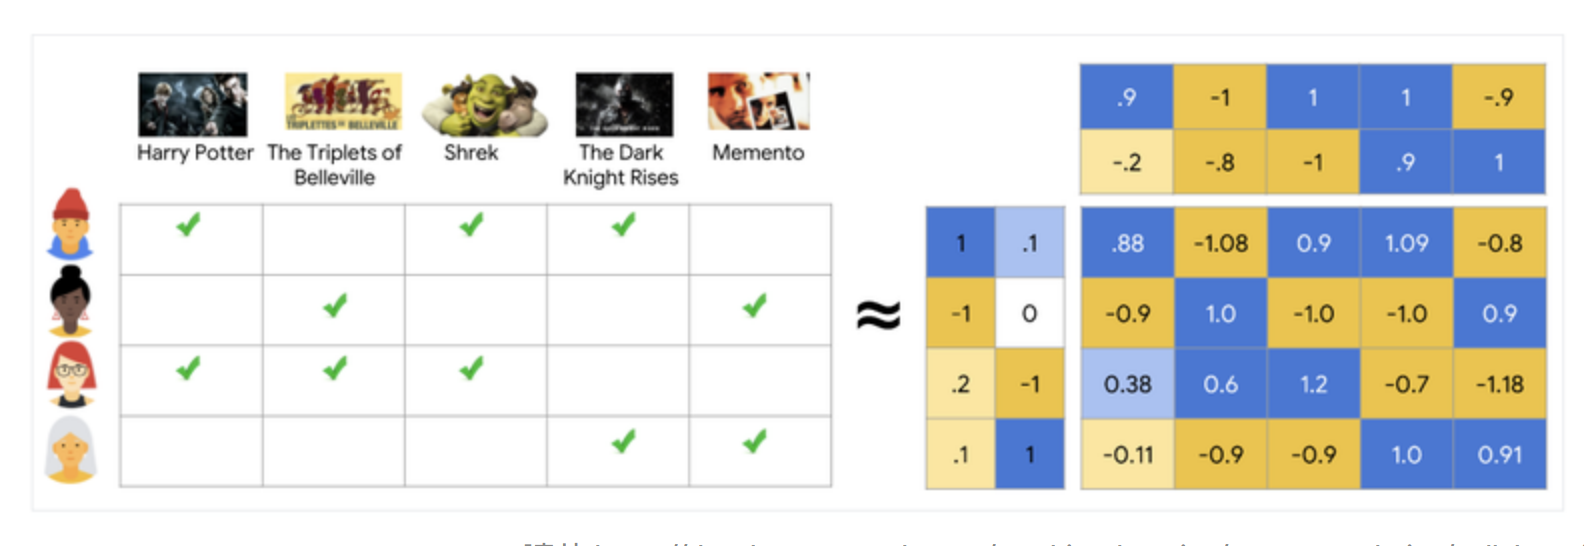

모델의 목표는 모든 유저와 아이템에 대하 k-dimension의 벡터를 잘 만드는 것입니다.  
벡터를 잘 만드는 기준은 유저 i의 벡터$(U_i)$와 아이템 j의벡터$(I_j)$를 내적했을 때 유저 i가 아이템j에 대해 평가한 수치 $(M_{i,j})$와 비슷한지 입니다.

MF에도 다양한 변형이 있습니다. 이번에 사용할 모델은 [Collaborative Filtering for Implicit Feedback Datasets](http://yifanhu.net/PUB/cf.pdf) 논문에서 제안한 모델을 사용할 것입니다.

이 모델의 경우 이전 스텝에서 제가 'black eyed peas'를 play했다는 데이터를 추가했기 때문에 저의 벡터와 black eyed peas의 벡터를 곱했을 때 1에 가까워야 모델이 잘 학습하는 것을 목표로 합니다.

오해할 수 있는데, 제가 black eyed peas를 5번 들었어도 모델이 근사하고자 하는 것이 아티스트를 선호하는지 안 하는지를 맞히는 것이기 때문에 두 벡터를 곱했을 때 5에 가까워지는 대신 1에 가까워져야 합니다.

이를 통해서 제가 들어보지 못한 queen에 대해서도 저의 벡터와 queen의 벡터를 곱하여 수치를 예상할 수 있습니다.

만약 목표가 유저의 재생 횟수를 맞혀야 하는 것(혹은 별점을 맞히는 것)이라면 그에 맞는 다른 모델을 사용해야 합니다. 모델의 구조는 거의 똑같고, 모델의 목표를 재생횟수를 맞히는 쪽으로 놓고 학습(유저와 아이템의 벡터를 만들기)하면 됩니다! 궁금하다면 [참고 자료](https://towardsdatascience.com/recommendation-system-matrix-factorization-d61978660b4b)를 확인해 주세요.

## 13-6. CSR(Compressed Sparse Row) Matrix

유저 X 아이템 평가 행렬을 다시 생각해 봅시다. 유저는 36만 명이고 아티스트는 29만 명입니다. 이를 행렬로 표현하고 행렬의 각 원소에 정수 한 개 (1byte)가 들어간다면 36만 * 29만 * 1byte \approx≈ 97GB가 필요합니다.

참고로 여러분들이 사용하고 계실 컴퓨터의 메모리는 많아야 16GB일 테니 97GB나 되는 거대한 행렬을 메모리에 올려놓고 작업한다는 것은 불가능할 것입니다. 이런 경우의 좋은 대안이 되는 것이 CSR(Compressed Sparse Row) Matrix입니다. 다음 스텝에서 수행할 모델 학습의 input으로 사용할 데이터 타입을 CSR Matrix로 할 것입니다.

CSR Matrix는 Sparse한 matrix에서 0이 아닌 유효한 데이터로 채워지는 데이터의 값과 좌표 정보만으로 구성하여 메모리 사용량을 최소화하면서도 Sparse한 matrix와 동일한 행렬을 표현할 수 있도록 하는 데이터 구조입니다.

CSR Matrix는 data, indices, indptr 로 행렬을 압축하여 표현합니다. 그 원리를 아래 행렬 예시를 통해 설명하겠습니다.

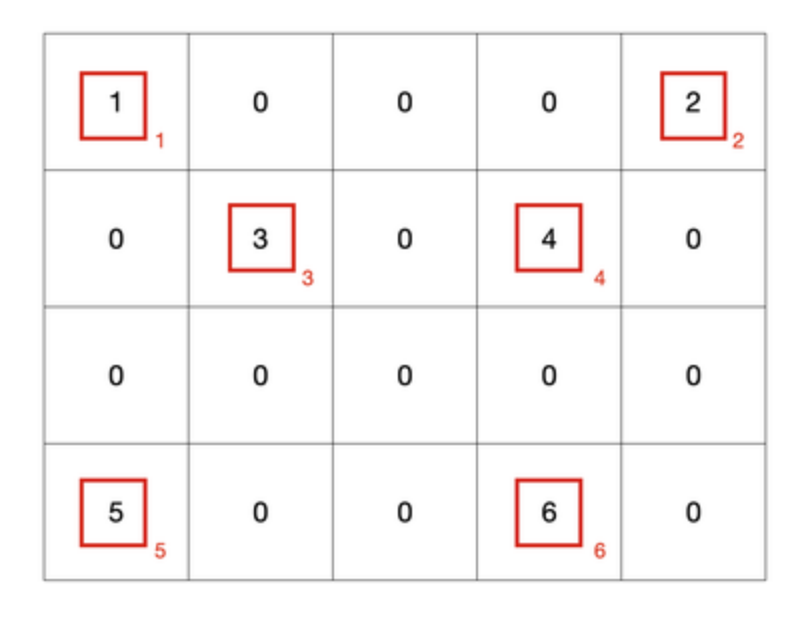

- data는 0이 아닌 원소를 차례로 기입한 값입니다.
> data = [1, 2, 3, 4, 5, 6]

- indices는 data의 각 요소가 어느 열(column)에 있는지를 표현한 index입니다.
> indices = [0, 4, 1, 3, 0, 3]

- indptr은 [최초시작행번호,시작행에서의 데이타 개수,두번째 행에서의 데이타 누적 개수,...,마지막행에서의 데이타 누적개수] 입니다. 이를 통해 data의 요소들이 어느 행(row)에 있는지를 알 수 있습니다.
> indptr = [0, 2, 4, 4, 6]

- 이를 통해 data[0:2]는 첫 번째 행, data[2:4]는 두 번째 행, data[4:4]는 세 번째 행, data[4:6]는 네 번째 행에 위치함을 나타낼 수 있게 됩니다.

Q8. 다음과 같이 표현되는 CSR Matrix를 (4,4) matrix 형태로 다시 그려 보세요.

data = np.array([1,3,5,6,2,11,7,9,10,12])

indices = np.array([1,2,3,0,1,3,1,2,2,3])

indptr = np.array([0,3,6,8,10])

[0,1,3,5],
[6,2,0,11],
[0,7,9,0],
[0,0,10,12]

- 이제 우리의 data를 CSR Matrix에 맞게 바꿔보겠습니다.
- DataFrame을 만드는 방식이 다양하듯 csr_matrix를 [만드는 방법](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)은 다양하게 있습니다.
- 현재 data와 같은 데이터 구조에 적합한 방식은 위 링크(혹은 아래 사진)에서 4번째로 설명하고 있는 방법입니다.


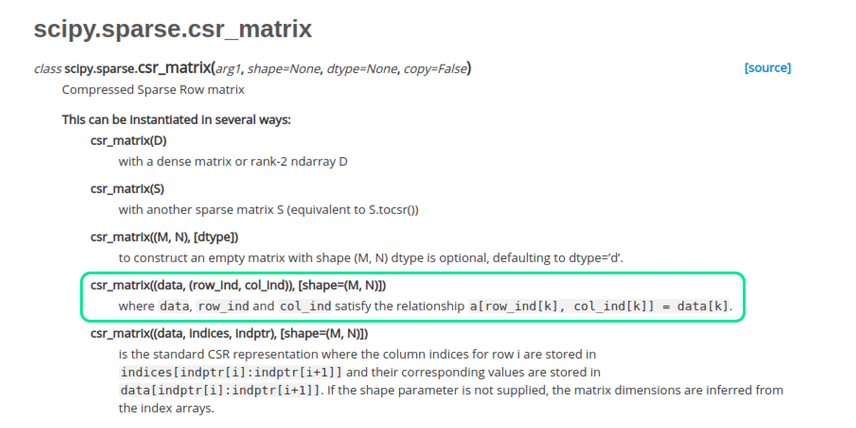

In [19]:
# 실습 위에 설명보고 이해해서 만들어보기
from scipy.sparse import csr_matrix

num_user = data['user_id'].nunique()
num_artist = data['artist'].nunique()

csr_data = csr_matrix((data.play, (data.user_id, data.artist)), shape= (num_user, num_artist))
csr_data

<358869x291347 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Row format>

In [20]:
num_artist

291347

## 13-7. MF 모델 학습하기

이전 스텝에서 설명한 Matrix Factorization 모델을 [implicit](https://github.com/benfred/implicit) 패키지를 사용하여 학습해 봅시다.

- implicit 패키지는 이전 스텝에서 설명한 암묵적(implicit) dataset을 사용하는 다양한 모델을 굉장히 빠르게 학습할 수 있는 패키지입니다.
- 이 패키지에 구현된 als(AlternatingLeastSquares) 모델을 사용하겠습니다. Matrix Factorization에서 쪼개진 두 Feature Matrix를 한꺼번에 훈련하는 것은 잘 수렴하지 않기 때문에, 한쪽을 고정시키고 다른 쪽을 학습하는 방식을 번갈아 수행하는 AlternatingLeastSquares 방식이 효과적인 것으로 알려져 있습니다.

In [21]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np

# implicit 라이브러리에서 권장하고 있는 부분입니다. 학습 내용과는 무관합니다.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

AlternatingLeastSquares 클래스의 __init__ 파라미터를 살펴보겠습니다.

1. factors : 유저와 아이템의 벡터를 몇 차원으로 할 것인지
1. regularization : 과적합을 방지하기 위해 정규화 값을 얼마나 사용할 것인지
1. use_gpu : GPU를 사용할 것인지
1. iterations : epochs와 같은 의미입니다. 데이터를 몇 번 반복해서 학습할 것인지

1과 4를 늘릴수록 학습 데이터를 잘 학습하게 되지만 과적합의 우려가 있으니 좋은 값을 찾아야 합니다.

In [22]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, regularization=0.01, use_gpu=False, iterations=15, dtype=np.float32)

In [23]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose해줍니다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<291347x358869 sparse matrix of type '<class 'numpy.int64'>'
	with 17535578 stored elements in Compressed Sparse Column format>

In [24]:
# 모델 훈련
als_model.fit(csr_data_transpose)

  0%|          | 0/15 [00:00<?, ?it/s]

모델 학습이 끝났습니다! 이제 2가지를 아래 사항을 살펴보도록 하겠습니다.

1. Zimin 벡터와 black eyed peas의 벡터를 어떻게 만들고 있는지
1. 두 벡터를 곱하면 어떤 값이 나오는지

In [25]:
zimin, black_eyed_peas = user_to_idx['zimin'], artist_to_idx['black eyed peas']
zimin_vector, black_eyed_peas_vector = als_model.user_factors[zimin], als_model.item_factors[black_eyed_peas]

print('슝=3')

슝=3


In [26]:
print(zimin_vector)
print(zimin_vector.shape)

[ 0.41349965 -0.80078965 -0.8737613  -1.2152454  -0.16181622 -0.5566902
  0.25135282  0.14428622 -0.40393427 -0.26508218 -0.27460152  0.34940553
 -0.25179845 -0.31519508  0.44291243  0.3015253   0.09315469 -0.04766364
 -0.5086494   1.2249095   0.7178704   0.99394804  0.16396345  0.231311
  1.1785805   0.09318712 -0.45304856  0.5826875  -0.8625534   0.6091903
 -0.7638117   0.7725326   0.5347391   0.15057535  0.517141    0.6217351
 -0.41781914  0.09153454 -0.99893343  1.1377809  -0.03856662 -0.61806446
  0.24491653  0.610459   -0.7741975   0.03118099  0.6659333   0.3626266
  1.272595   -0.15289423  0.9124902  -1.1114265  -0.5829508  -0.38702387
 -0.34690845 -0.1475856   1.2981293  -0.723912    1.0530277  -0.19056033
  0.6298089  -0.38775387 -0.68162143  0.01337976 -0.5210746   0.67159724
  0.9880448   0.6441267  -0.7589227  -0.4170518  -0.11521693 -0.46057922
  0.9886375   0.170684   -0.6114809   0.61246616  0.9178736   0.98486876
  0.17196614 -0.14787902  0.89556485  1.3994008   0.33192

In [27]:
print(black_eyed_peas_vector)
print(black_eyed_peas_vector.shape)

[ 0.00256733  0.00035786 -0.00631108 -0.00971161  0.0041955  -0.01686163
  0.00373494 -0.00600288  0.00841138  0.00623156  0.01534891  0.01754467
  0.00296542  0.00588562  0.01969258  0.0130546  -0.00054569  0.00580614
 -0.01201812  0.03253781  0.02381575  0.00342367  0.0225953   0.01373448
  0.03391718  0.00080205  0.00387104  0.01509647 -0.01415054  0.00992959
  0.00266103  0.01442895  0.02849684  0.02138256  0.01805677  0.02359318
  0.01615176 -0.00171779 -0.00815075  0.00152737  0.00659307 -0.00565255
  0.00915431  0.00291007  0.00698404  0.01108118  0.00278333  0.00485268
  0.02209762  0.00498199  0.02689658 -0.01804834 -0.0018581   0.01009252
  0.00745152 -0.00402097  0.01798359  0.009359    0.01667605  0.01045469
  0.01299593  0.00354159 -0.00014517  0.01190535 -0.00341682  0.01329734
  0.01073068  0.00857474  0.01198314  0.01109727  0.00664107  0.01200007
  0.01233754  0.00684661  0.00213696  0.01427379  0.00992409  0.01570005
  0.00450831 -0.00704462  0.01974194  0.01370175  0

In [28]:
# zimin과 black_eyed_peas를 내적하는 코드
np.dot(zimin_vector, black_eyed_peas_vector)

0.5217822

이런, 1이 나와야 될 것 같은데 한참 낮은 수치인 0.49 정도가 나왔습니다. factors를 늘리거나 iterations를 늘려야 할 것 같습니다. 이후 진행되는 내용은 일단 이렇게 학습된 모델을 사용하겠습니다.


>Q9. 만약 이 두 수치를 늘려 1에 가깝게 나왔다면 이 모델이 잘 학습되었다고 볼 수 있을까요?
>
>A. 아직 검증되지 않았다. 학습데이터에 대해서 fitting은 되었지만 아직 보지 못한 데이터에 대한, 예를 들어 제가 queen을 선호할지에 대한 예측을 잘할지 못할지는 검증하지 않았기 때문입니다.

In [29]:
# 그렇다면 모델이 저의 queen에 대한 선호도를 어떻게 예측할지 한 번 보겠습니다.
queen = artist_to_idx['queen']
queen_vector = als_model.item_factors[queen]
np.dot(zimin_vector, queen_vector)

0.337484

>Q.10. queen에 대한 선호도를 예측한 결과를 어떻게 해석하면 좋을까요? 사용자와 아티스트 벡터 내적이 0.5를 기준으로 그보다 높으면 모델이 선호한다고 판단했다고 말할 수 있을까요?
>
>모델을 만드는 사람이 정하기 나름입니다. 객관적인 지표로 만들어서 기준을 정할 수도 있고 도메인 경험을 통해 정할 수도 있습니다.
추천 시스템은 다른 머신러닝 task보다 객관적인 평가가 어려운 분야입니다. 사람을 도통 알 수 없기 때문에 객관적인 지표를 정하기 어렵기 때문입니다.

## 13-8. 비슷한 아티스트 찾기 + 유저에게 추천하기

### 비슷한 아티스트 찾기

-----------------------------------

AlternatingLeastSquares 클래스에 구현되어 있는 similar_items 메서드를 통하여 비슷한 아티스트를 찾습니다. 처음으로는 제가 좋아하는 coldplay로 찾아보겠습니다.

In [30]:
favorite_artist = 'coldplay'
artist_id = artist_to_idx[favorite_artist]
similar_artist = als_model.similar_items(artist_id, N=15)
similar_artist

[(62, 1.0000002),
 (28, 0.98358643),
 (277, 0.98265207),
 (5, 0.98101497),
 (473, 0.9679906),
 (247, 0.96635485),
 (217, 0.9656562),
 (418, 0.9640226),
 (490, 0.96052974),
 (694, 0.95156306),
 (55, 0.9512879),
 (268, 0.9486656),
 (910, 0.94817406),
 (1018, 0.9449225),
 (75, 0.9379157)]

(아티스트의 id, 유사도) Tuple 로 반환하고 있습니다. 아티스트의 id를 다시 아티스트의 이름으로 매핑 시켜 주겠습니다.

In [31]:
#artist_to_idx 를 뒤집어, index로부터 artist 이름을 얻는 dict를 생성합니다. 
idx_to_artist = {v:k for k,v in artist_to_idx.items()}
[idx_to_artist[i[0]] for i in similar_artist]

['coldplay',
 'the killers',
 'muse',
 'red hot chili peppers',
 'placebo',
 'the beatles',
 'radiohead',
 'u2',
 'oasis',
 'foo fighters',
 'arctic monkeys',
 'pink floyd',
 'nirvana',
 'the smashing pumpkins',
 'queen']

In [32]:
def get_similar_artist(artist_name: str):
    artist_id = artist_to_idx[artist_name]
    similar_artist = als_model.similar_items(artist_id)
    similar_artist = [idx_to_artist[i[0]] for i in similar_artist]
    return similar_artist

print("슝=3")

슝=3


In [33]:
get_similar_artist('2pac')

['2pac',
 'notorious b.i.g.',
 'dr. dre',
 'the game',
 'ludacris',
 'snoop dogg',
 'nas',
 'ice cube',
 '50 cent',
 'jay-z']

In [34]:
get_similar_artist('lady gaga')

['lady gaga',
 'britney spears',
 'rihanna',
 'katy perry',
 'beyoncé',
 'the pussycat dolls',
 'christina aguilera',
 'kelly clarkson',
 'justin timberlake',
 'leona lewis']

### 유저에게 아티스트 추천하기

----------------------------------------------

AlternatingLeastSquares 클래스에 구현되어 있는 recommend 메서드를 통하여 제가 좋아할 만한 아티스트를 추천받습니다. filter_already_liked_items 는 유저가 이미 평가한 아이템은 제외하는 Argument입니다.

In [35]:
user = user_to_idx['zimin']
# recommend에서는 user*item CSR Matrix를 받습니다.
artist_recommended = als_model.recommend(user, csr_data, N=20, filter_already_liked_items=True)
artist_recommended

[(350, 0.46020168),
 (550, 0.4572973),
 (369, 0.44818512),
 (1800, 0.44258356),
 (354, 0.4218257),
 (2249, 0.4200803),
 (274, 0.41280383),
 (355, 0.41228983),
 (627, 0.40949982),
 (391, 0.40126768),
 (621, 0.38758135),
 (618, 0.3863114),
 (5555, 0.38139898),
 (724, 0.37985998),
 (409, 0.36560348),
 (382, 0.36438704),
 (1777, 0.35884988),
 (5, 0.35643518),
 (901, 0.34765252),
 (418, 0.34733677)]

In [36]:
[idx_to_artist[i[0]] for i in artist_recommended]

['rihanna',
 'britney spears',
 'justin timberlake',
 'lady gaga',
 'nelly furtado',
 'katy perry',
 'michael jackson',
 'madonna',
 'maroon 5',
 'christina aguilera',
 'alicia keys',
 'the pussycat dolls',
 'timbaland',
 'lily allen',
 'amy winehouse',
 'mika',
 'mariah carey',
 'red hot chili peppers',
 'pink',
 'u2']

rihanna를 추천해 주고 있네요. 모델은 왜 rihanna를 추천해 줬을까요? AlternatingLeastSquares 클래스에 구현된 explain 메서드를 사용하면 제가 기록을 남긴 데이터 중 이 추천에 기여한 정도를 확인할 수 있습니다.

In [37]:
rihanna = artist_to_idx['rihanna']
explain = als_model.explain(user, csr_data, itemid=rihanna)

이 method는 추천한 콘텐츠의 점수에 기여한 다른 콘텐츠와 기여도(합이 콘텐츠의 점수가 됩니다.)를 반환합니다. 어떤 아티스트들이 이 추천에 얼마나 기여하고 있는 걸까요?

In [38]:
[(idx_to_artist[i[0]], i[1]) for i in explain[1]]

[('beyoncé', 0.21945952564297608),
 ('black eyed peas', 0.13659881578118166),
 ('jason mraz', 0.058299187695586764),
 ('coldplay', 0.046226562897983),
 ('maroon5', 0.0003230655036911575)]

beyoncé와 black eyed peas가 가장 크게 기여했네요. 둘 다 흑인 아티스트이고 beyoncé의 경우는 같은 성별이라는 점도 크게 작용하지 않았을까 싶습니다.

눈치채신 분도 있겠지만 결과가 조금 이상합니다. filter_already_liked_items=True로 했는데 앞에 maroon 5는 제가 이미 평가한 아이템이 나오고 있습니다. 이것은 implicit 버전 0.4.2에서 생긴 버그입니다. 코드는 사람이 만들기 때문에 이렇게 실수할 가능성이 있습니다.
오픈 소스 생태계에서는 누구든 이런 문제점을 지적하고 Pull Request를 통하여 수정을 제안할 수 있습니다.
많이들 사용하는 Tensorflow나 numpy, pandas도 여러 작은 버그들이 있습니다. 이런 유명한 패키지의 오류를 고쳐서 Pull Request를 하여 Contribute 한다면 좋은 이력이 되기도 합니다.

모델이 추천한 20개 중 몇 개를 실제로 선호하는지 계산하여 모델의 객관적인 지표를 만들 수 있을 것 같습니다. 자세한 방법은 이쪽을 참고해 주세요.

### 마무리

-----------------------------

후~ 고생 많으셨습니다!
추천 시스템에서 Baseline으로 많이 사용되는 MF를 통해 유저에게 아티스트를 추천해 보았습니다. 이제 여러분은 추천 시스템 관련 task에서 기본 모델을 만드실 수 있을 겁니다.

그러나 우리가 만든 모델은 몇 가지 아쉬운 점이 있습니다.

1. 유저, 아티스트에 대한 Meta 정보를 반영하기 쉽지 않습니다. 연령대별로 음악 취향이 굉장히 다르지 않을까요?
1. 유저가 언제 play 했는지에 반영하기 쉽지 않습니다. 10년 전에 즐겨듣던 아티스트와 지금 즐겨듣는 아티스트를 비교해 보세요.

이러한 이유와 딥러닝의 발전으로 MF 이외의 모델 구조도 많이 연구/ 사용되고 있습니다. 하지만 어떤 추천 모델도 핵심은 MF와 비슷합니다.
유저와 아이템에 대한 벡터를 잘 학습하여 취향에 맞게(유저에 맞게) 아이템을 보여주거나(Retrieval) 걸러내는(Filtering) 역할입니다.